In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import  date

Matplotlib is building the font cache; this may take a moment.


In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
plt.style.use('ggplot')
df=pd.read_csv('US_accidents_for_5_states.csv')

   Unnamed: 0     ID    Source    TMC  Severity           Start_Time  \
0         728  A-729  MapQuest  201.0         3  2016-06-21 10:34:40   
1         729  A-730  MapQuest  201.0         3  2016-06-21 10:30:16   
2         730  A-731  MapQuest  201.0         2  2016-06-21 10:49:14   
3         731  A-732  MapQuest  201.0         3  2016-06-21 10:41:42   
4         732  A-733  MapQuest  201.0         2  2016-06-21 10:16:26   

              End_Time  Start_Lat   Start_Lng  End_Lat  End_Lng  Distance(mi)  \
0  2016-06-21 11:04:40  38.085300 -122.233017      NaN      NaN           0.0   
1  2016-06-21 11:16:39  37.631813 -122.084167      NaN      NaN           0.0   
2  2016-06-21 11:19:14  37.896564 -122.070717      NaN      NaN           0.0   
3  2016-06-21 11:11:42  37.334255 -122.032471      NaN      NaN           0.0   
4  2016-06-21 11:04:16  37.250729 -121.910713      NaN      NaN           0.0   

                                         Description  Number  \
0  Right hand sh

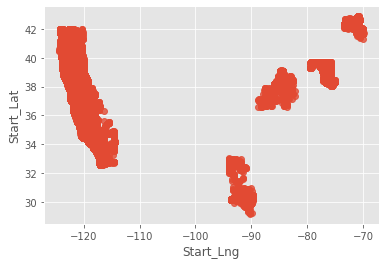

2    685264
3    283868
4     16807
1      7591
Name: Severity, dtype: int64
CA    816825
LA     61515
MD     53593
MA     39044
KY     22553
Name: State, dtype: int64


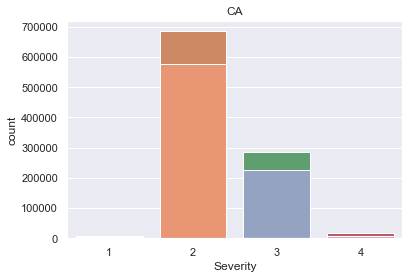

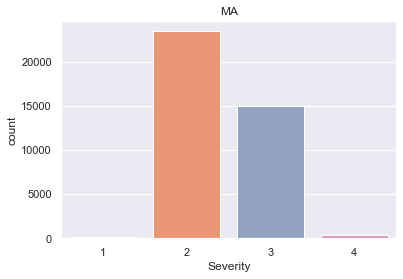

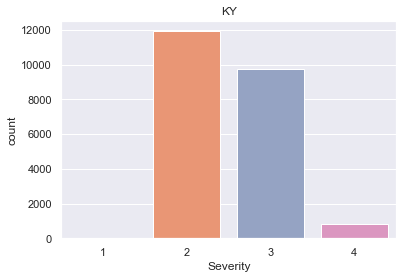

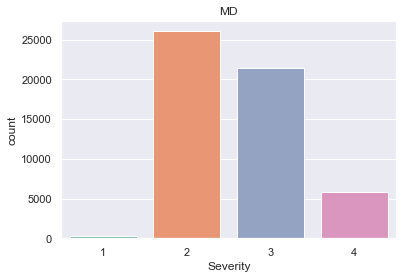

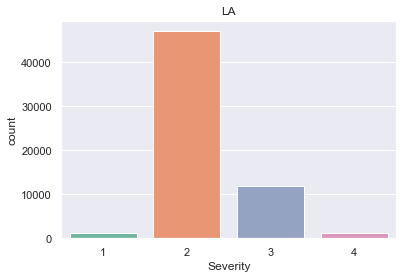

In [3]:
#Our analysis is for the 5 states of CA, MA, KY, MD and LA
print(df.head(5))

#printing the first five entries

state_abbreviation=['CA','MA','KY','MD','LA']

sns.regplot(x=df["Start_Lng"], y=df["Start_Lat"], fit_reg=False);
plt.show()

#print(df.columns)
print(df.Severity.value_counts())

sns.set(style="darkgrid")
sns.countplot(x="Severity",data=df)
#countplot to analyse the number of accidents by severity

print(df.State.value_counts())

#plot to see the distribution of accidents by severity in each state
for i in state_abbreviation:
    filtered_df = df[(df['State'] == i)]
    sns.countplot(x="Severity",data=filtered_df,palette = "Set2").set_title(i)
    #plt.scatter(filtered_df["Temperature(F)"], filtered_df["Humidity(%)"])
    plt.show()

#total number of accidents in each state

In [4]:
severity=[2,3,4]

# Set a list of colors, markers and linestyles for plotting
color_lst=['r','b','k','g','m']
marker_lst=['D','o','*','+','s']
linestyle_lst=['dashed','dashdot','solid','dashdot','solid']

# Set a list of month, weekday, hour for reindex purpose and time_duraction to clear the accident
month_lst = [ 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug','Sep','Oct','Nov','Dec']
weekday_lst = [ 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekday_lst_full = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hour_lst= np.arange(24)
td='Time_Duration(min)'

In [5]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')

# Extract year, month, day, hour, weekday and time_duration information
df['Start_Year']=df['Start_Time'].dt.year
df['Start_Month']=df['Start_Time'].dt.strftime('%b')
df['Start_Day']=df['Start_Time'].dt.day
df['Start_Hour']=df['Start_Time'].dt.hour
df['Start_Weekday']=df['Start_Time'].dt.strftime('%a')

# Extract the amount of time in the unit of minutes for each accident, round to the nearest integer
td='Time_Duration(min)'
df[td]=round((df['End_Time']-df['Start_Time'])/np.timedelta64(1,'m'))

print(df.shape)

(993530, 56)


In [6]:
allday_lst=df.Start_Time.astype(str).str.split(' ')

allday_lst2=[item[0] for item in allday_lst]

print('For the 5 states')
print('There are {} total accidents.'.format(df.shape[0]))
print('There are {} total days.'.format(len(allday_lst2)))
print('There are {} unique days.'.format(len(set(allday_lst2))))
print('On average, there are {} accidents per day.'.format(round(df.shape[0]/len(set(allday_lst2)))))

For the 5 states
There are 993530 total accidents.
There are 993530 total days.
There are 1586 unique days.
On average, there are 626 accidents per day.


In [7]:
# Find out how many days (Monday-Sunday) between the beginning and end of this dataset.

calendar_weekday_num=[]

d1=df.Start_Time.min()
d2=df.Start_Time.max()

for i in range(7):

    count = 0

    for d_ord in range(d1.toordinal(), d2.toordinal()+1):
        d = date.fromordinal(d_ord)
        if (d.weekday() == i):
            count += 1
    calendar_weekday_num.append(count)

print('Number of days for Monday-Sunday: {}.'.format(calendar_weekday_num))
print('Total number of days between {} and {}: {} days.'.format(d1,d2,sum(calendar_weekday_num)))

Number of days for Monday-Sunday: [230, 230, 229, 229, 229, 229, 229].
Total number of days between 2016-02-08 21:30:31 and 2020-06-30 23:18:09: 1605 days.


In [8]:
state_lst=['CA','MA','KY','MD','LA']

# For each state, find out how many unique days for each weekday/weekend

# Initialize an empty list to hold the number of days for each weekday/weekend for the three states
weekday_num_state=[]

# Run a for loop for the list of states: NJ, PA, & NY
for state in state_lst:
    
    # Initialize an empty list to hold the number of days for each weekday
    weekday_num=[]
    
    # Run a for loop for the whole week
    for weekday in weekday_lst:
        
        # Slice the dataframe for specific state & weekday
        df_weekday=df[(df['State']==state) & (df.Start_Weekday==weekday)]
        
        # For each weekday, extract the day information from the Start_Time column, by separating the datetime into day and hour
        day_lst1=df_weekday.Start_Time.astype(str).str.split(' ')
        
        # Extract the first item which is the day information
        day_lst2=[item[0] for item in day_lst1]
        
        # Append the day into the list weekday_num
        weekday_num.append(len(set(day_lst2)))

    # Append the day with state information encoded into the list weekday_num_state
    weekday_num_state.append(weekday_num)

print('For the states of {}, here is the list of numbers of weekdays (Mon-Sun): {}.'.format(state_lst,weekday_num_state))

For the states of ['CA', 'MA', 'KY', 'MD', 'LA'], here is the list of numbers of weekdays (Mon-Sun): [[223, 224, 222, 223, 222, 219, 222], [222, 221, 220, 223, 218, 186, 182], [216, 224, 216, 217, 212, 176, 179], [215, 220, 215, 215, 213, 214, 211], [195, 197, 197, 196, 199, 181, 180]].


For the state of CA, the percentage of days with accident during this period in the data set: [97.0, 97.0, 97.0, 97.0, 97.0, 96.0, 97.0]%.
For the state of MA, the percentage of days with accident during this period in the data set: [97.0, 96.0, 96.0, 97.0, 95.0, 81.0, 79.0]%.
For the state of KY, the percentage of days with accident during this period in the data set: [94.0, 97.0, 94.0, 95.0, 93.0, 77.0, 78.0]%.
For the state of MD, the percentage of days with accident during this period in the data set: [93.0, 96.0, 94.0, 94.0, 93.0, 93.0, 92.0]%.
For the state of LA, the percentage of days with accident during this period in the data set: [85.0, 86.0, 86.0, 86.0, 87.0, 79.0, 79.0]%.
[[97.0, 97.0, 97.0, 97.0, 97.0, 96.0, 97.0], [97.0, 96.0, 96.0, 97.0, 95.0, 81.0, 79.0], [94.0, 97.0, 94.0, 95.0, 93.0, 77.0, 78.0], [93.0, 96.0, 94.0, 94.0, 93.0, 93.0, 92.0], [85.0, 86.0, 86.0, 86.0, 87.0, 79.0, 79.0]]


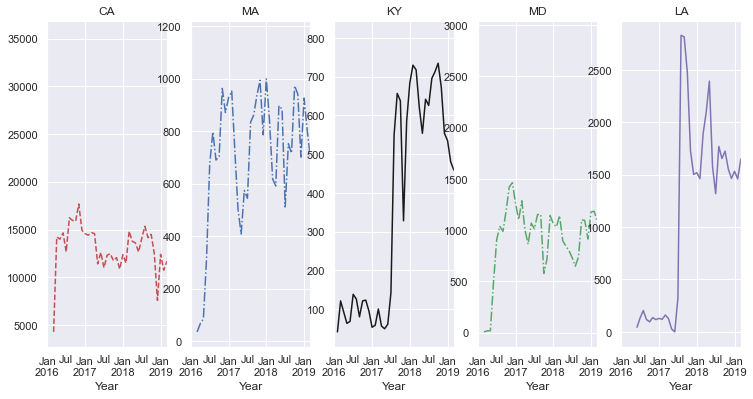

In [9]:
day_pct_lst=[]
for i,state in enumerate(state_lst):
    day_pct=[round(int(item1)/int(item2),2)*100 for item1,item2 in zip(weekday_num_state[i],calendar_weekday_num)]
    day_pct_lst.append(day_pct)
    print('For the state of {}, the percentage of days with accident during this period in the data set: {}%.'.format(state_lst[i], day_pct))

print(day_pct_lst)



# Set the start_time as the index for resampling purpose
df.set_index('Start_Time',drop=True,inplace=True)


# Set the size of the figure
fig= plt.figure(figsize=(15,6))

# Run a for loop for each state
for i,state in enumerate(state_lst):
    
    # Set a sub plot
    plt.subplot(1, 6, 1+i)
     # Slice the dataframe for the specific state and weekday
    df[df['State']==state].resample('M').count()['ID'].plot(linestyle=linestyle_lst[i], color=color_lst[i])
    
    # Set the limits and labels
    plt.xlim('2016','2019-Mar')
    plt.xlabel('Year')
    plt.title('{}'.format(state))

plt.show()

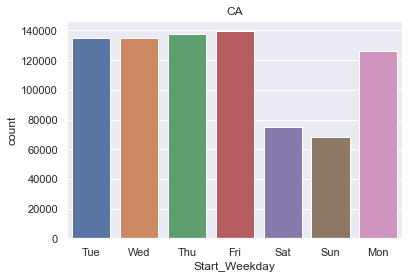

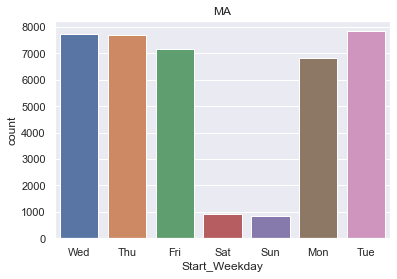

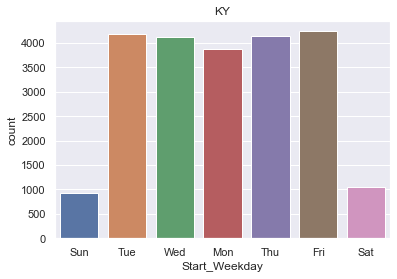

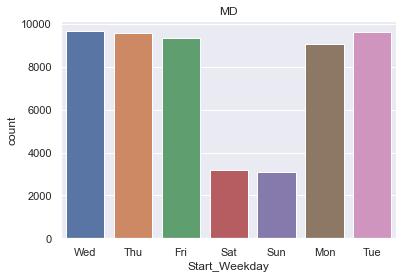

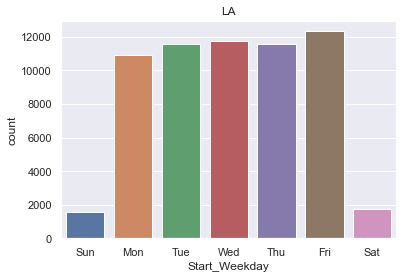

In [10]:
for i in state_abbreviation:
    
    filtered_df = df[(df['State'] == i)]
    sns.countplot(x="Start_Weekday",data=filtered_df).set_title(i)
    plt.show()

In [11]:
# Set the size of the figure

# The severity for each location for each state; for each of the following locations, what's the severity of the accident?
feature='Start_Weekday'
fig_x=len(state_lst)


# Divide the total number of accidents by the number of unique days

# Set the size of the figure
fig= plt.figure(figsize=(5*fig_x,6))

# Cutoff percentage for display
pct_cutoff=2

# Define autopct: only display the value if the percentage is greater than the predefined cutoff value
def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > pct_cutoff else ''

<Figure size 1800x432 with 0 Axes>

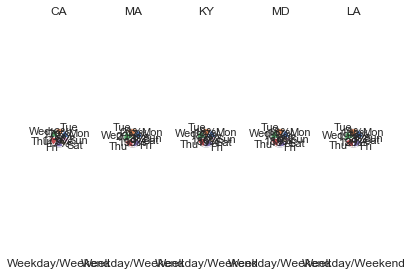

In [12]:
# Run a for loop for each state
for i,state in enumerate(state_lst):
    
    # Set a sub plot
    plt.subplot(1, 6, 1+i)
    
    # Slice the dataframe for the specific state and weekday
    df_temp=df[df['State']==state].groupby('Start_Weekday').count()['ID'].reindex(weekday_lst)
    
    # checkpoint
    # print('df_temp:', df_temp)
    # print('weekday_num_state[i]:',weekday_num_state[i])
    
    # Divid the number of accidents by the number of unique days, using list comprehension
    df_temp2=[round(int(item1)/int(item2)) for item1,item2 in zip(df_temp,weekday_num_state[i])]
    
    # checkpoint
    # print('df_temp2:', df_temp2)
    
    # Convert the list of pandas series for plot
    df_temp2=pd.Series(df_temp2)
    
    # Make a bar plot, using different color and set the title as the state
    # df_temp2.plot(kind='bar',color=color_lst[i]).set_title(state)
    
    # Define lables to go with the pie plot
    labels = [n if v > pct_cutoff/100 else '' for n, v in zip(df_temp.index, df_temp)] 
    
    # Generate the pie plot
    plt.pie(df_temp2, labels=labels, autopct=my_autopct, shadow=True)
        
    # Set axis,label and title
    plt.axis('equal')
    plt.xlabel('Weekday/Weekend')
    plt.title(state)
    
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Start_Hour'>

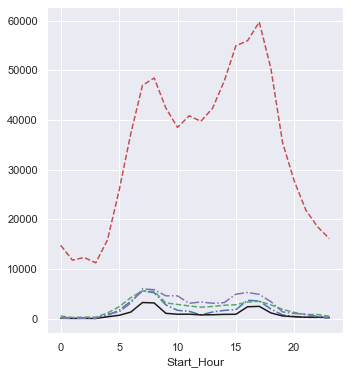

In [13]:
fig= plt.figure(figsize=(18,6))

# Plot all data together
plt.subplot(1, 3, 1)

# Plot the states of New Jersey, Pennsylvania, & New York on all days, group the data by hours and count the number of accident, reorder the data by hours, make lineplot with certain style and color
df[df['State']=='CA'].groupby('Start_Hour').count()['ID'].reindex(hour_lst).plot(linestyle='dashed',color='r')
df[df['State']=='MA'].groupby('Start_Hour').count()['ID'].reindex(hour_lst).plot(linestyle='dashdot',color='b')
df[df['State']=='KY'].groupby('Start_Hour').count()['ID'].reindex(hour_lst).plot(linestyle='solid',color='k')
df[df['State']=='MD'].groupby('Start_Hour').count()['ID'].reindex(hour_lst).plot(linestyle='dashed',color='g')
df[df['State']=='LA'].groupby('Start_Hour').count()['ID'].reindex(hour_lst).plot(linestyle='dashdot',color='m')


<AxesSubplot:xlabel='Start_Hour'>

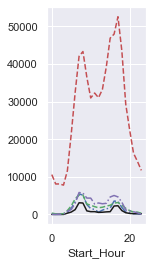

In [14]:
# Set labels, limit, legend, title and xticks
plt.ylabel('Number of accidents')
plt.xlabel('Hour')
plt.legend(['CA','MA','KY','MD','LA'])
plt.title('All days')
plt.xticks(np.arange(0, 24, step=2))

# Weekdays
plt.subplot(1, 3, 2)

# Plot the states of New Jersey, Pennsylvania, & New York on weekdays, group the data by hours and count the number of accident, reorder the data by hours, make lineplot with certain style and color
df[(df['State']=='CA') & (df['Start_Weekday'].isin(weekday_lst[:5]))].groupby('Start_Hour').count()['ID'].reindex(hour_lst).plot(linestyle='dashed',color='r')
df[(df['State']=='MA') & (df['Start_Weekday'].isin(weekday_lst[:5]))].groupby('Start_Hour').count()['ID'].reindex(hour_lst).plot(linestyle='dashdot',color='b')
df[(df['State']=='KY') & (df['Start_Weekday'].isin(weekday_lst[:5]))].groupby('Start_Hour').count()['ID'].reindex(hour_lst).plot(linestyle='solid',color='k')
df[(df['State']=='MD') & (df['Start_Weekday'].isin(weekday_lst[:5]))].groupby('Start_Hour').count()['ID'].reindex(hour_lst).plot(linestyle='dashed',color='g')
df[(df['State']=='LA') & (df['Start_Weekday'].isin(weekday_lst[:5]))].groupby('Start_Hour').count()['ID'].reindex(hour_lst).plot(linestyle='dashdot',color='m')

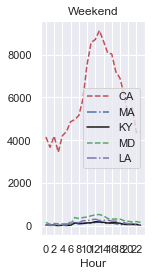

In [15]:
# Set labels, limit, legend, title and xticks
plt.xlabel('Hour')
plt.legend(['CA','MA','KY','MD','LA'])
plt.title('Weekdays')
plt.xticks(np.arange(0, 24, step=2))

# Weekends
plt.subplot(1, 3, 3)

# Plot the state of New Jersey on weekends, group the data by hours and count the number of accident, reorder the data by hours, make lineplot with certain style and color
df[(df['State']=='CA') & (df['Start_Weekday'].isin(weekday_lst[5:]))].groupby('Start_Hour').count()['ID'].reindex(hour_lst).plot(linestyle='dashed',color='r')
df[(df['State']=='MA') & (df['Start_Weekday'].isin(weekday_lst[5:]))].groupby('Start_Hour').count()['ID'].reindex(hour_lst).plot(linestyle='dashdot',color='b')
df[(df['State']=='KY') & (df['Start_Weekday'].isin(weekday_lst[5:]))].groupby('Start_Hour').count()['ID'].reindex(hour_lst).plot(linestyle='solid',color='k')
df[(df['State']=='MD') & (df['Start_Weekday'].isin(weekday_lst[5:]))].groupby('Start_Hour').count()['ID'].reindex(hour_lst).plot(linestyle='dashed',color='g')
df[(df['State']=='LA') & (df['Start_Weekday'].isin(weekday_lst[5:]))].groupby('Start_Hour').count()['ID'].reindex(hour_lst).plot(linestyle='dashdot',color='m')

# Set labels, limit, legend, title and xticks
plt.xlabel('Hour')
plt.legend(['CA','MA','KY','MD','LA'])
plt.title('Weekend')
plt.xticks(np.arange(0, 24, step=2))

plt.tight_layout()
plt.show()

<ipython-input-16-9e53b5965e50>:26: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(df_temp, labels=labels, autopct=my_autopct, shadow=True)


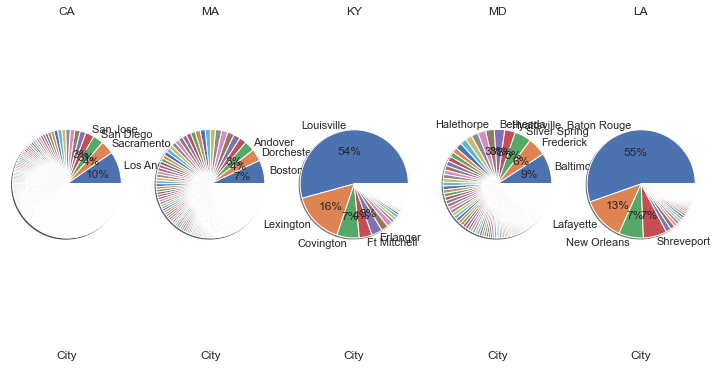

In [16]:
feature='City'

# Set the size of the figure
fig= plt.figure(figsize=(15,6))

# Cutoff percentage for display
pct_cutoff=2.5

# Define autopct: only display the value if the percentage is greater than the predefined cutoff value
def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > pct_cutoff else ''

# Run a for loop for each state
for i,state in enumerate(state_lst):
    
    # Set a sub plot
    plt.subplot(1, 6, 1+i)
    # Slice the dataframe for the specific state and feature
    df_temp=df[df['State']==state][feature].value_counts(normalize=True).round(8)

    # Define lables to go with the pie plot
    labels = [n if v > pct_cutoff/100 else ''
              for n, v in zip(df_temp.index, df_temp)] 
    
    # Generate the pie plot
    plt.pie(df_temp, labels=labels, autopct=my_autopct, shadow=True)
    
    # Set axis,label and title
    plt.axis('equal')
    plt.xlabel(feature)
    plt.title(state)

plt.xlabel(feature)
plt.show()

In [17]:
feature='Accident location'

# Set the state as the index
df.set_index('State',drop=True,inplace=True)

# State is the index when selecting bool type data as df_bool
df_bool=df.select_dtypes(include=['bool'])

# Reset the index of the original data for other calculations
df.reset_index(inplace=True)

# Set the size of the figure
fig= plt.figure(figsize=(15,6))

# Cutoff percentage for display
pct_cutoff=2.5

# Define autopct: only display the value if the percentage is greater than the predefined cutoff value
def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > pct_cutoff else ''


<Figure size 1080x432 with 0 Axes>

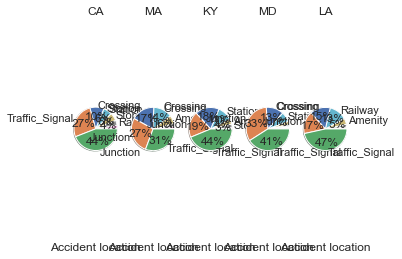

In [18]:
# Run a for loop for each state
for i,state in enumerate(state_lst):
    
    # Set a sub plot
    plt.subplot(1, 6, 1+i)
    # Slice the dataframe for the specific state and feature
    df_temp=df_bool[df_bool.index==state]
    df_temp=(df_temp.sum(axis=0)/df_temp.sum(axis=0).sum()).sort_values()

    
    # Define lables to go with the pie plot
    labels = [n if v > pct_cutoff/100 else ''
              for n, v in zip(df_temp.index, df_temp)] 
    
    # Generate the pie plot
    plt.pie(df_temp, labels=labels, autopct=my_autopct, shadow=True)
    
    # Set axis,label and title
    plt.axis('equal')
    plt.xlabel(feature)
    plt.title(state)

plt.xlabel(feature)
plt.show()

In [19]:
df[df['State']==state]['Weather_Condition'].value_counts(normalize=True).round(5)


# The weather condition for each state
feature='Weather_Condition'

# Set the size of the figure
fig= plt.figure(figsize=(15,6))

# Cutoff percentage for display
pct_cutoff=2

# Define autopct: only display the value if the percentage is greater than the predefined cutoff value
def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > pct_cutoff else ''


<Figure size 1080x432 with 0 Axes>

<ipython-input-20-02f58f858de0>:14: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(df_temp, labels=labels, autopct=my_autopct, shadow=True)
<ipython-input-20-02f58f858de0>:21: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


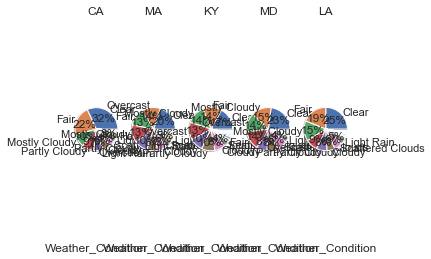

In [20]:
# Run a for loop for each state
for i,state in enumerate(state_lst):
    
    # Set a sub plot
    plt.subplot(1, 6, 1+i)
    # Slice the dataframe for the specific state and feature
    df_temp=df[df['State']==state][feature].value_counts(normalize=True).round(2)

    # Define lables to go with the pie plot
    labels = [n if v > pct_cutoff/100 else ''
              for n, v in zip(df_temp.index, df_temp)] 
    
    # Generate the pie plot
    plt.pie(df_temp, labels=labels, autopct=my_autopct, shadow=True)
    
    # Set axis,label and title
    plt.axis('equal')
    plt.xlabel(feature)
    plt.title(state)

plt.tight_layout()
plt.show()